In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [2]:
business_data = []
for line in open('business.json', 'r', encoding='utf-8'):
    business_data.append(json.loads(line))

In [3]:
review_data = []
for line in open('review.json', 'r', encoding='utf-8'):
    review_data.append(json.loads(line))

In [4]:
business_df = pd.DataFrame(business_data)

In [5]:
city = business_df[(business_df['city'] == 'Austin') & (business_df['is_open'] == 1)]

In [6]:
austin = city[['business_id', 'name', 'categories', 'stars']]
austin

,business_id,name,categories,stars
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"Shopping, Jewelry Repair, Appraisal Services, ...",5.0
24,nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,"Hotels, Hotels & Travel, Event Planning & Serv...",3.0
27,8XyEpVdAO0o6iVkVxkWosQ,PS Property Management Company,"Home Services, Real Estate, Property Management",4.5
37,NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"Chiropractors, Health & Medical",5.0
39,s8eTWEtW5WcnL2kUxrOVmw,Austin Regional Clinic: ARC Quarry Lake,"Diagnostic Services, Doctors, Internal Medicin...",3.5
...,...,...,...,...
160564,3hST-OFbQzCgte1XugEtug,AcuStretch,"Massage, Beauty & Spas",4.0
160566,N1rn9F8Xj8zQRfVrrQHgnw,Salute Oral & Facial Surgery,"Health & Medical, General Dentistry, Dentists",3.5
160567,TLg7py9H1W0E-F8BAn5OJQ,Austin Stained Concrete and More,"Masonry/Concrete, Home Services, Flooring",5.0
160577,m1Qw53OgkxrWu59oddVf9A,Capital Area Speech & Occupational Therapy,"Educational Services, Health & Medical, Occupa...",4.0


In [7]:
res_austin = austin[austin['categories'].str.contains('Restaurant.*')==True].reset_index()
res_austin

,index,business_id,name,categories,stars
0,41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"Bars, Nightlife, Cocktail Bars, Seafood, Resta...",4.5
1,61,bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,"Fast Food, Restaurants, Burgers",2.0
2,199,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,"Italian, Salad, Pizza, Nightlife, Restaurants,...",3.0
3,253,Ieelu69Y23nbjKG3OGfwnw,McDonald's,"Restaurants, Coffee & Tea, Food, Burgers, Fast...",1.5
4,258,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,"Tex-Mex, Mexican, Tacos, Restaurants",3.5
...,...,...,...,...,...
2835,160413,Bqq7_qnQ8I1BVNcjr88Ksg,Lakeside Pizza & Grill,"Restaurants, Gluten-Free, Pizza, American (New)",3.5
2836,160465,fTgnVCCu6k_Ds25Nz73s5Q,Sushi Zushi,"Sushi Bars, Japanese, Soup, Restaurants, Asian...",3.0
2837,160480,erLD01SfdUbGWurNoJTAzw,The Vegan Yacht,"American (Traditional), Gluten-Free, Vegan, Lo...",4.5
2838,160517,io_UQS_WwonlCPCfKy3Hdw,Super Bowl,"Restaurants, Chinese",3.5


In [8]:
res_austin_id = res_austin[['business_id', 'stars']]
res_austin_id

,business_id,stars
0,NRPemqVb4qpWFF0Avq_6OQ,4.5
1,bRsDZ44CD3uhGnRY3NeQhQ,2.0
2,Pk4ZwXwUU50BDn5gqw_rKg,3.0
3,Ieelu69Y23nbjKG3OGfwnw,1.5
4,IFB2K3BEZ2L_Mv5AbUD26Q,3.5
...,...,...
2835,Bqq7_qnQ8I1BVNcjr88Ksg,3.5
2836,fTgnVCCu6k_Ds25Nz73s5Q,3.0
2837,erLD01SfdUbGWurNoJTAzw,4.5
2838,io_UQS_WwonlCPCfKy3Hdw,3.5


In [9]:
review_df = pd.DataFrame(review_data)

In [10]:
review_austin = pd.merge(review_df,res_austin_id,on="business_id")

In [11]:
review_austin

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,stars_y
0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,4.0
1,xxUbWSkZtPHrPFT_RhW68A,ZuB2N9UOIooj9nPtI3Re5g,mOnesB4IF9j6-ZmHoOHOig,2.0,0,0,0,I've given this place a couple of chances and ...,2014-01-17 00:55:26,4.0
2,48wQst-NfdRPpu32cUEsaA,AQUdnD35RBuCXNx0KxE5wA,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,Definitely one of my favorite places for vietn...,2015-06-21 00:30:24,4.0
3,0-k1eqpn_i2FnyBBwtFSYw,IYRlxx4G8fkkc6x_gk4sPg,mOnesB4IF9j6-ZmHoOHOig,5.0,0,0,0,My favorite Vietnamese restaurant in town. I l...,2017-09-08 23:20:38,4.0
4,JF4NXGCyOgkUIQzRlQRuuw,ZYs9y2Hk_C55Ynr40TGmUA,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,"Good food, good price, and good service. You ...",2010-07-07 16:27:26,4.0
...,...,...,...,...,...,...,...,...,...,...
612271,az-zmTRCxh9LQxub7aONUQ,G9vxPaZgba_SddJGNcPhaA,LhFdkeOzbxPi6NeGS-1K1Q,4.0,0,0,1,Fun little spot at the Mueller HEB! It's fun t...,2020-11-30 22:29:41,4.5
612272,Jin8E1kHU2XUR8tcHSR_Zw,2pAvWxTk8a7AczFh66n7lg,LhFdkeOzbxPi6NeGS-1K1Q,5.0,0,1,0,I do my grocery shopping at Meuller HEB and I ...,2020-12-01 00:53:35,4.5
612273,vKO8JVCa64PoUXLjLZlPWA,JuHJPUXICe7DgUFSZiwbNA,LhFdkeOzbxPi6NeGS-1K1Q,4.0,0,0,1,Not your average fried rice but most definitel...,2020-12-19 23:25:15,4.5
612274,_yqmtg9XS0sUSsEYt7PKig,MoB1Ig-3FaC4u1o8gm2rMg,LhFdkeOzbxPi6NeGS-1K1Q,5.0,7,2,5,I have been anxious to visit the H-E-B Mueller...,2020-08-28 22:53:56,4.5


In [44]:
df_badreviews = review_austin.loc[review_austin.stars_x >= 4]
df_badreviews.shape

(430833, 10)

In [45]:
bad_texts = []
for review in df_badreviews.text:
    bad_texts.append(review)

In [46]:
bad_texts[:3]

["I think their rice dishes are way better than their Pho's. Also I really like their sandwiches and spring rolls. I took a friend who haven't had viennese food ever. He absolutely love it.",
 'Definitely one of my favorite places for vietnamese grub! Very authentic and although they hardly speak english, the people here are really nice. Will always recommend others to try it.',
 "My favorite Vietnamese restaurant in town. I love the pho and the vermicelli bowls. I've tried many other places and none compare."]

In [47]:
def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1):
            if len(text_tokens[i]) < 4:
                del(text_tokens[i])

        texts_tokens.append(text_tokens)
        
    return texts_tokens

In [48]:
texts_tokens = tokenize(bad_texts)

In [49]:
len(texts_tokens)

430833

In [35]:
def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)
        
    return texts_filtered

In [50]:
texts_filtered = removeSW(texts_tokens)

In [51]:
len(texts_filtered)

430833

In [38]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        texts_lem.append(text_lem)
    
    return texts_lem

In [52]:
texts_lem = lemma(texts_filtered)

In [53]:
bad_texts_string = []
for text in texts_lem:
    string = ' '
    string = string.join(text)
    bad_texts_string.append(string)

In [54]:
bad_texts_string[:3]

['think rice dish better also really like sandwich spring roll take friend viennese food ever absolutely love',
 'definitely favorite place vietnamese grub authentic although hardly speak english people really nice always recommend others',
 'favorite vietnamese restaurant town love vermicelli bowl try many place none compare']

In [55]:
f = open('good_texts_string.txt', 'w', encoding='utf-8')
f.write(','.join(bad_texts_string))
f.close()

In [22]:
text_string = []
with open('bad_texts_string.txt', 'r', encoding='utf-8') as f:
    lines = f.read()
    line = lines.split(',')
    text_string.append(line)


In [23]:
text_string = text_string[0]


In [24]:
len(text_string)

111611

In [25]:
def plot_top_words(model, feature_names, n_top_words, title):
    #Modified from SKlearn
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=15)
        ax.tick_params(bottom=False)
        ax.set(xticklabels=[])

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [26]:
vectorizer = CountVectorizer(max_df=0.90, min_df=5)
X = vectorizer.fit_transform(text_string)
feature_names =  vectorizer.get_feature_names()

X.toarray().shape

(111611, 16507)

In [27]:
n_topics = 10

lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=12
)

lda.fit_transform(X)

array([[0.00212833, 0.98084445, 0.00212841, ..., 0.00212834, 0.00212845,
        0.00212871],
       [0.00270338, 0.19322906, 0.00270339, ..., 0.00270354, 0.00270325,
        0.11419037],
       [0.00454727, 0.00454736, 0.46746023, ..., 0.00454788, 0.00454697,
        0.00454707],
       ...,
       [0.00196124, 0.00196114, 0.00196175, ..., 0.00196136, 0.00196132,
        0.98234781],
       [0.00185232, 0.21136757, 0.13848316, ..., 0.38460363, 0.0018523 ,
        0.00185228],
       [0.003031  , 0.25185482, 0.58945355, ..., 0.00303127, 0.00303098,
        0.13747377]])

In [28]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, feature_names, no_top_words)

Topic 0:
burger sandwich fry order like time food cheese place good
Topic 1:
chicken order taste like food sauce rice good flavor fry
Topic 2:
order wait time minutes food take come say service tell
Topic 3:
order salad come steak menu dish good meal back would
Topic 4:
food place good like tacos service austin better really taco
Topic 5:
like place food make go never know back want people
Topic 6:
table food service drink seat come wait time take restaurant
Topic 7:
pizza place food like good taste really better would make
Topic 8:
order roll sushi food come place good fish like shrimp
Topic 9:
order call time would tell say card manager charge make


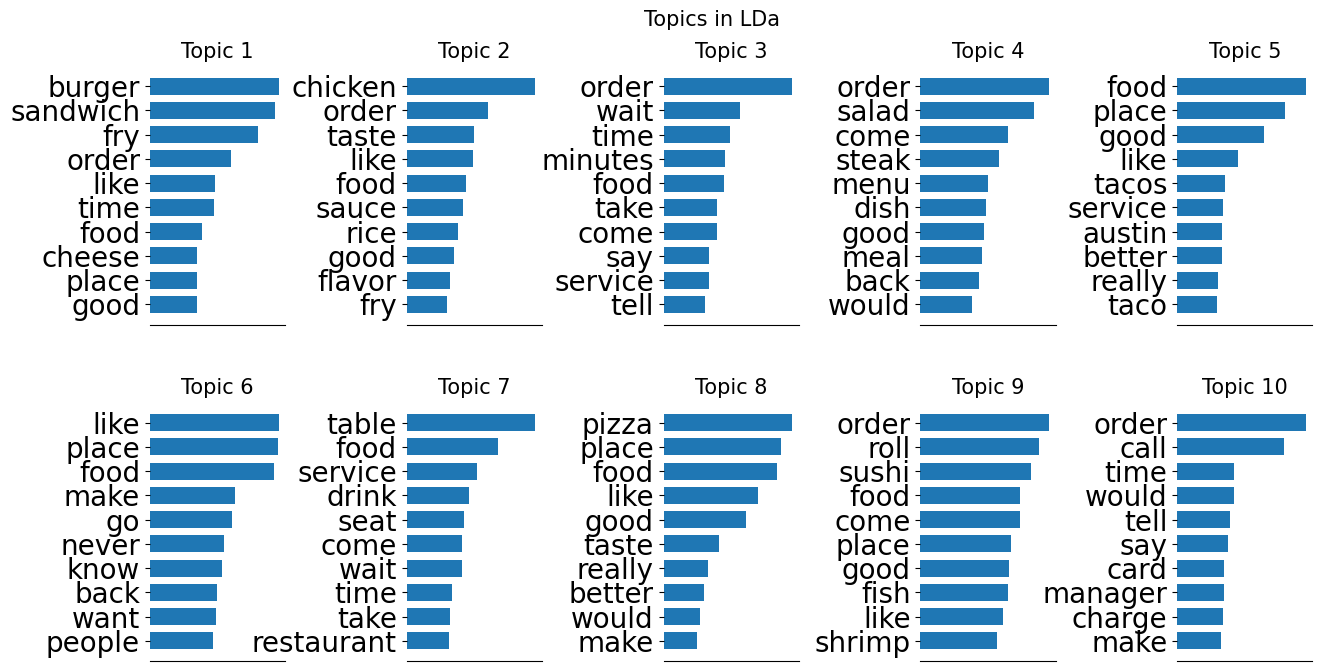

In [29]:
plot_top_words(lda, feature_names, no_top_words,'Topics in LDa')

In [31]:
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit_transform(X)

D:\software\code-project\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


array([[0.        , 0.05933824, 0.03902179, ..., 0.00162791, 0.        ,
        0.03601727],
       [0.01697373, 0.01868313, 0.0350762 , ..., 0.05442486, 0.        ,
        0.0046092 ],
       [0.01361575, 0.        , 0.        , ..., 0.0712778 , 0.        ,
        0.        ],
       ...,
       [0.08566043, 0.01085502, 0.07190998, ..., 0.        , 0.        ,
        0.        ],
       [0.01358871, 0.01955852, 0.07957441, ..., 0.00527528, 0.00405613,
        0.04498286],
       [0.02276615, 0.00760954, 0.03700993, ..., 0.10566691, 0.        ,
        0.00090597]])

In [32]:
no_top_words = 10
display_topics(nmf, feature_names, no_top_words)

Topic 0:
say tell would ask go manager back make want call
Topic 1:
good chicken fry taste sauce really flavor dish would make
Topic 2:
order take minutes pizza call wrong pick online delivery wait
Topic 3:
food restaurant cold eat take quality great mexican price fast
Topic 4:
place austin people better go give want really think review
Topic 5:
wait table minutes seat take host drink another restaurant leave
Topic 6:
time go first last every location give always long make
Topic 7:
come back drink take server waitress never ask waiter bring
Topic 8:
service drink customer good great even experience never server take
Topic 9:
like taste look really make want know feel seem something


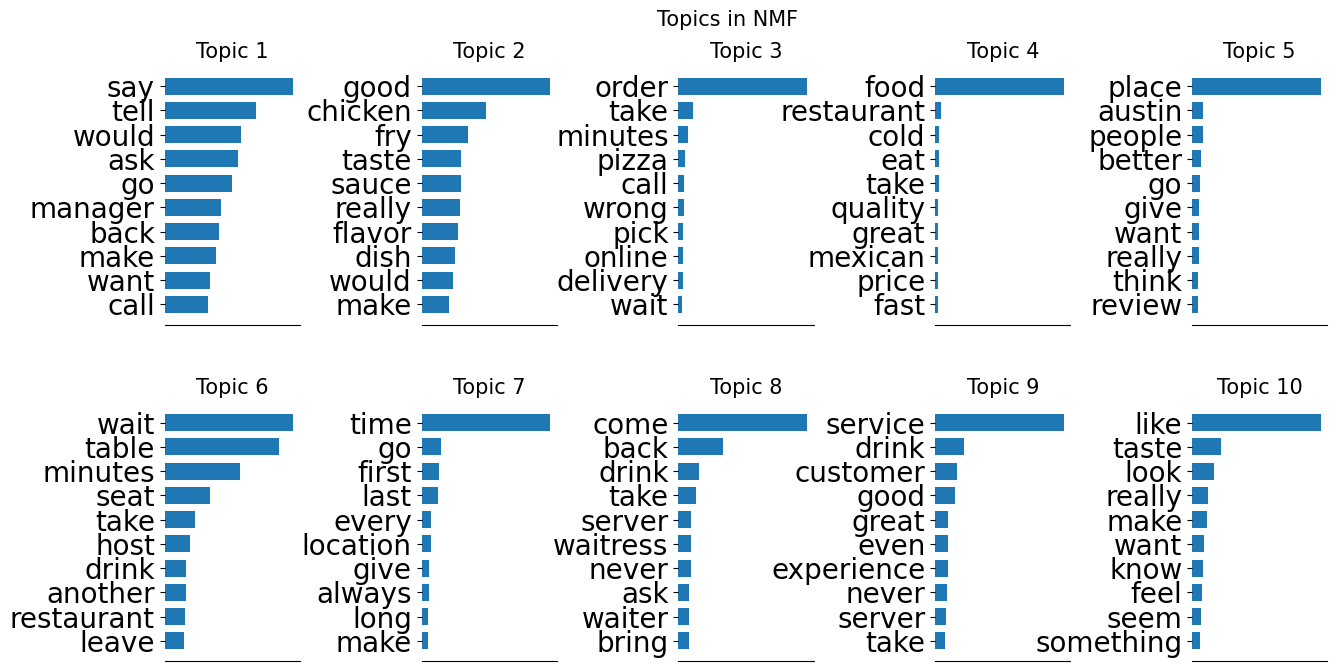

In [34]:
plot_top_words(nmf, feature_names, no_top_words,'Topics in NMF')


In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
    min_df=5,  
    stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(text_string)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [37]:
lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=12
)

lda.fit_transform(tfidf)

array([[0.01678668, 0.01678785, 0.84890846, ..., 0.01678911, 0.01678819,
        0.01678794],
       [0.01871601, 0.01871679, 0.83152106, ..., 0.01872122, 0.01871942,
        0.01871939],
       [0.0202049 , 0.02019824, 0.02019979, ..., 0.02019823, 0.02019749,
        0.02019941],
       ...,
       [0.0158607 , 0.01586049, 0.01585988, ..., 0.01585998, 0.01586148,
        0.01586303],
       [0.01443619, 0.01443589, 0.87005308, ..., 0.01443969, 0.01443671,
        0.01445286],
       [0.01828284, 0.01828201, 0.01828178, ..., 0.45861556, 0.01828208,
        0.01828242]])

In [38]:
no_top_words = 10
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
dirty food clean place mask wear hand floor smell disgust
Topic 1:
sushi coffee burger place food good like taste price better
Topic 2:
chicken fry food taste order like good sauce place rice
Topic 3:
rude manager card customer service say tell order food ask
Topic 4:
food service place good time wait view great slow drink
Topic 5:
order pizza wait time minutes delivery food drive say phone
Topic 6:
order sandwich time burger location drive food wrong make fry
Topic 7:
tacos taco food good like taste place cheese order salsa
Topic 8:
food place good price like steak service menu restaurant great
Topic 9:
table wait come food minutes order service drink time ask


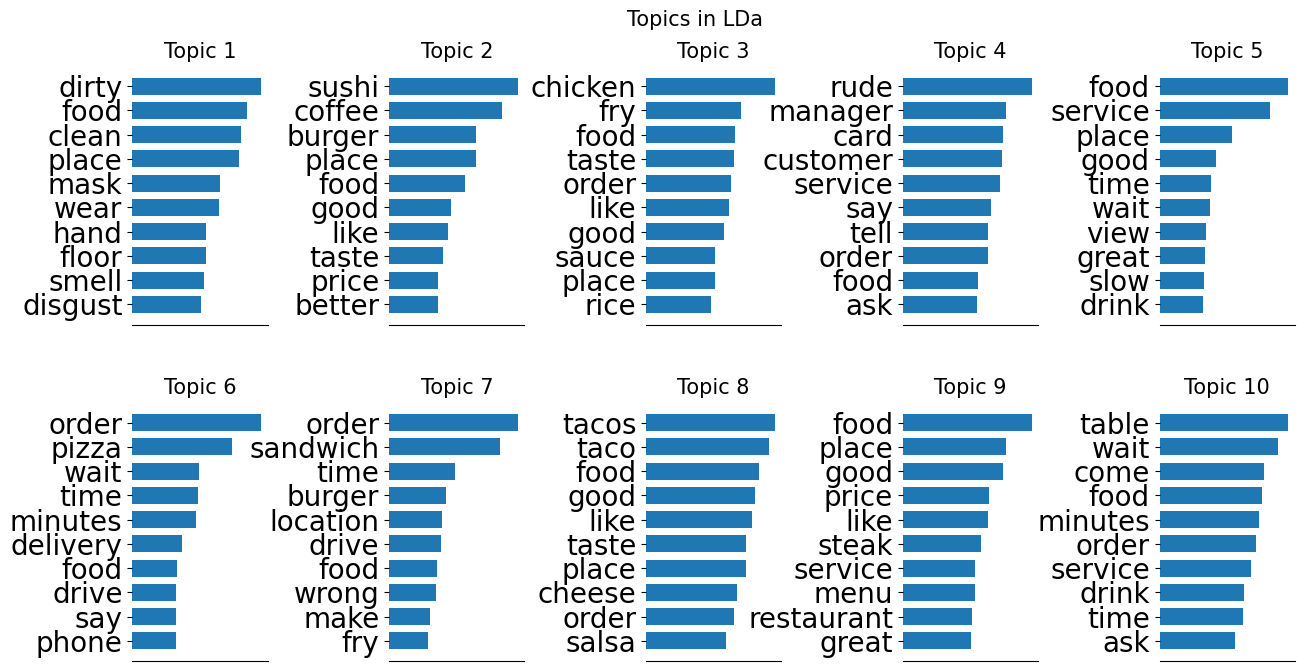

In [39]:
plot_top_words(lda, tfidf_feature_names, no_top_words,'Topics in LDa')

In [40]:
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit_transform(tfidf)

array([[0.        , 0.01248522, 0.00388339, ..., 0.        , 0.        ,
        0.01683201],
       [0.00431082, 0.00530636, 0.00399307, ..., 0.        , 0.        ,
        0.        ],
       [0.00994902, 0.00081876, 0.00056715, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01006862, 0.0053786 , 0.00896978, ..., 0.        , 0.        ,
        0.        ],
       [0.00131039, 0.00614582, 0.0055098 , ..., 0.00018524, 0.00026563,
        0.        ],
       [0.00801218, 0.        , 0.0066902 , ..., 0.        , 0.00078855,
        0.00014368]])

In [41]:
display_topics(nmf, feature_names, no_top_words)

Topic 0:
supporters saltgrass colleagues arugula tamales madden larry victoria vindicate rendition
Topic 1:
legit physician globby synonymous rafael fish prance benny sakes tempo
Topic 2:
ogle thankyou wich limo obsess drain perimeter degenerate pepperoncini tamales
Topic 3:
photo croquet silly degenerate chatter photographer deform thurs patience sakes
Topic 4:
florida scrounge homage task globby grade thankyou physician sip white
Topic 5:
vest miff hook liquor scanner leslie supporters thankyou festivities pasty
Topic 6:
surpass surgeon brandon routine chatter childhood tier bathtub psycho behaviors
Topic 7:
bull freshen bullet chatter secrets coconut paprika continuous tastewise backbone
Topic 8:
dozen colleagues visitors baristas script veteran vibe brewers ogle childhood
Topic 9:
chemo freshen respectable rusty sakes pernil rosé snobbery continuous weight


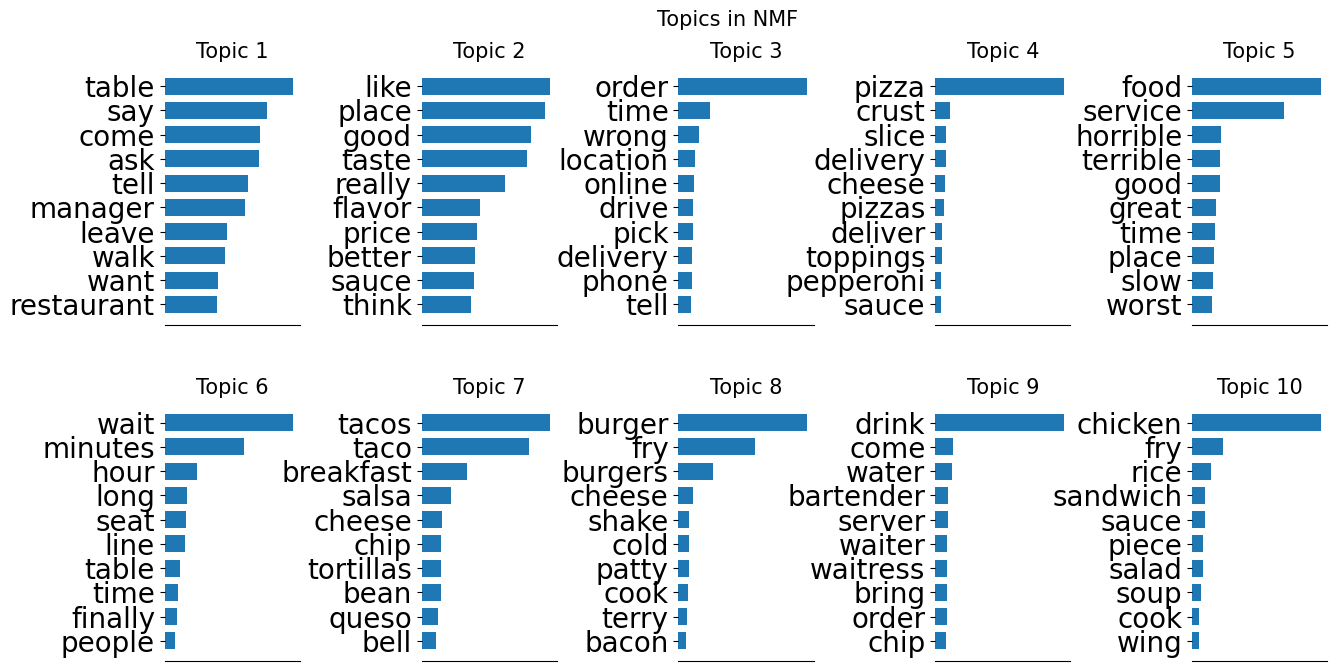

In [44]:
plot_top_words(nmf, tfidf_feature_names, no_top_words,'Topics in NMF')